In [1]:
from tqdm import tqdm  
import treescope as ts 
import matplotlib.pyplot as plt
import torch

class Logger(dict):
    def log(self, **kwargs):
        for k, v in kwargs.items():
            self.setdefault(k, []).append(v)

In [2]:
from data import DNADataset
from vae import SequenceVAE
dataset = DNADataset("hf://datasets/Zehui127127/latent-dna-diffusion/sequence.csv")
model = SequenceVAE(in_dim=5, out_dim=_)
ts.display(model)

In [ ]:
device = torch.device("cuda:1")
model = model.to(device=device)
optimizer = torch.optim.Adam(model.parameters(), lr=3e-4)
dataloader = torch.utils.data.DataLoader(dataset, batch_size=256, shuffle=True)

logger = Logger()
cycles = 10
epochs = 10
max_beta = 1.0
for cycle in range(cycles):
    for j in range(epochs):
        for i, X in enumerate(pbar := tqdm(dataloader)):
            cycle_progress = (j * len(dataloader) + i + 1) / (epochs * len(dataloader))
            beta = min(max_beta, 2*cycle_progress*max_beta)

            X = X.to(device=device, dtype=torch.float32)
            loss_recon, loss_kl = model.losses(X)

            optimizer.zero_grad()
            (loss_recon + beta * loss_kl).backward()
            optimizer.step()

            logger.log(recon=loss_recon.item(), kl=loss_kl.item(), beta=beta)
            pbar.set_description(
                f"recon: {sum(logger["recon"][-10:])/10:.6f}, kl: {sum(logger['kl'][-10:])/10:.6f}, beta: {beta:.3f}"
            )

    torch.save(model, f"model_cycle_{cycle}.pth")

recon: 1.362457, kl: 0.080968, beta: 0.059:  29%|██▉       | 182/622 [00:14<00:33, 13.15it/s]

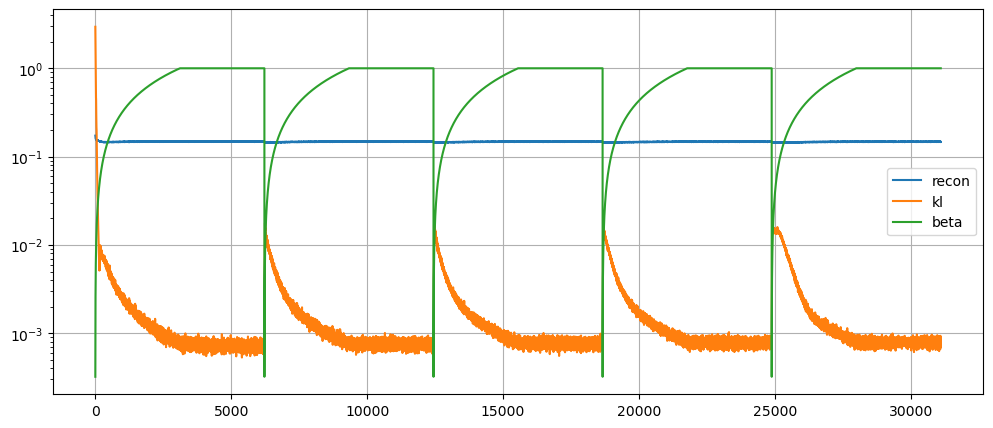

In [11]:
plt.figure(figsize=(12, 5))
plt.semilogy(logger["recon"], label="recon")
plt.semilogy(logger["kl"], label="kl")
plt.plot(logger["beta"], label="beta")
plt.legend()
plt.grid()
plt.show()